This project is devoted to creating classification machine learning model for detecting breast cancer

In [2]:
# 0 Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore', category = UserWarning)
warnings.simplefilter('ignore')

# 1 Import dataset 

Basic download of the dataset

In [4]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

# 2 Prediction. (follows later)

# 3 Summary statistics

There are 569 observations and 30 features in the dataset:

In [5]:
X.shape

(569, 30)

**Explanation of feature names and their descriptive statistics**

The dataset has 3 types of features: mean, error and worst. Mean stands for some mean measures of brests. Error stands for standard error of those measures. Finally, worst stands for the maximums in measures of certain parameters. 

Usually breast cancer can be found by doctor through pulpation of the breasts. Hard and highly distinctive points can be indicators of cancer. Therefore, high values of "error" features and big differences between "mean" and "worst" features can indicate cancer.

Here are names of the features, their explanation and some descriptive statistics:

**mean radius** - radius of breasts in centimeters. Average is 14, maximum is 28, minimum is 7 \
**mean texture** -  The standard deviation of gray-scale values (i.e., texture smoothness). Average is 19, minimum is 9, maximum is 39\
**mean perimeter** -  The average perimeter of the breast. min 43, max 188, mean 91\
**mean area** -  The average area of the breast.\
**mean smoothness** -  The mean of local variation in radius lengths.\
**mean compactness** -  A measure of the compactness of the breast (perimeter^2 / area - 1.0) \
**mean concavity** -  The mean severity of concave portions of the breast contour.\
**mean concave points** -  The mean number of concave points on the breast.\
**mean symmetry** -  The symmetry of the breast.\
**mean fractal dimension** -  A measure of the "roughness" of breast  ("coastline approximation" - 1)

**radius error** -  The standard error of the radius.\
**texture error** -  The standard error of the texture.\
**perimeter error** -  The standard error of the perimeter.\
**area error** -  The standard error of the area.\
**smoothness error** -  The standard error of the smoothness.\
**compactness error** -  The standard error of the compactness.\
**concavity error** -  The standard error of the concavity.\
**concave points error** -  The standard error of the concave points.\
**symmetry error** -  The standard error of the symmetry.\
**fractal dimension error** -  The standard error of the fractal dimension.

**worst radius** - Maximum of radius\
**worst texture** - Maximum of texture\
**worst perimeter** - Maximum of perimeter\
**worst area** - Maximum of area\
**worst smoothness** - Maximum of smoothness\
**worst compactness** - Maximum of compactness\
**worst concavity** - Maximum of concativity\
**worst concave points** - Maximum of concave points\
**worst symmetry** - Maximum of symmetry\
**worst fractal dimension** - Maximum of fractal dimension

In [6]:
display(X.iloc[:,:10].describe())
display(X.iloc[:,10:20].describe())
display(X.iloc[:,20:30].describe())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 4 Exploring the target feature

There are 62.7% of observations with cancer and 37.3% without cancer. Therefore, the dataset is imbalanced. It is far from the ratio of 50/50. However, the dataset is not as imbalanced as some other dataset related to medical industry.

0.627

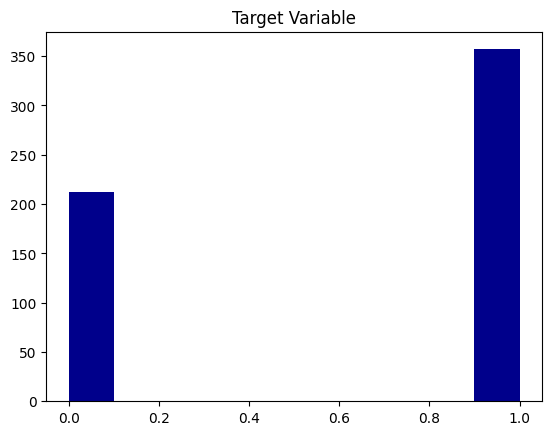

In [7]:
plt.hist(y, color = 'darkblue');
plt.title('Target Variable')
y.mean().round(3)

# 5 Histrograms for numerical features

30 histograms are build so that the 1st column represents "mean features", the 2nd column represents "error" features, and the 3rd model represents "worst" features.

Very few features seem to follow normal distribution. Most of them seem to follow log-normal or X^2 distribution. 

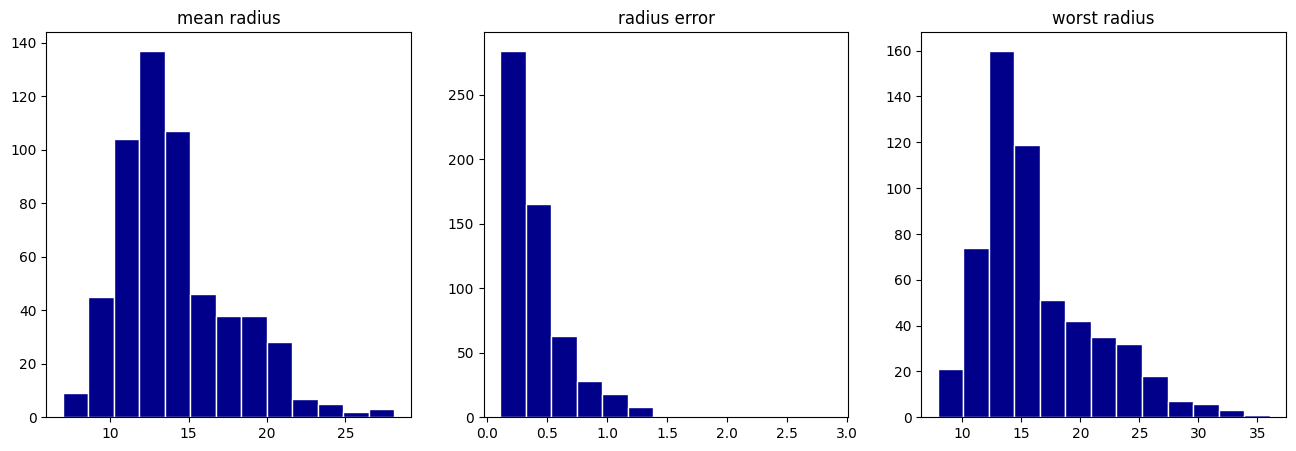

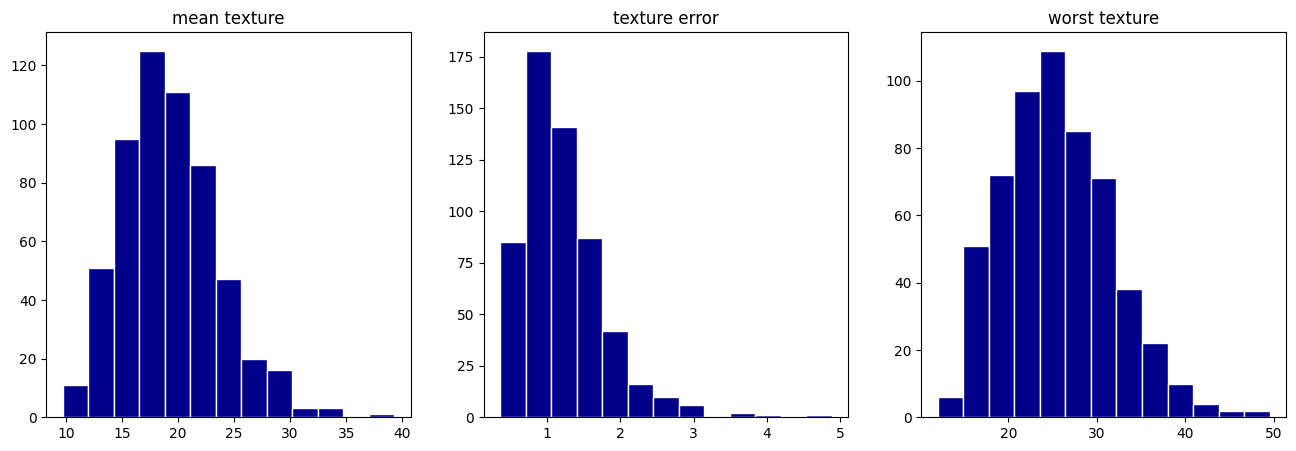

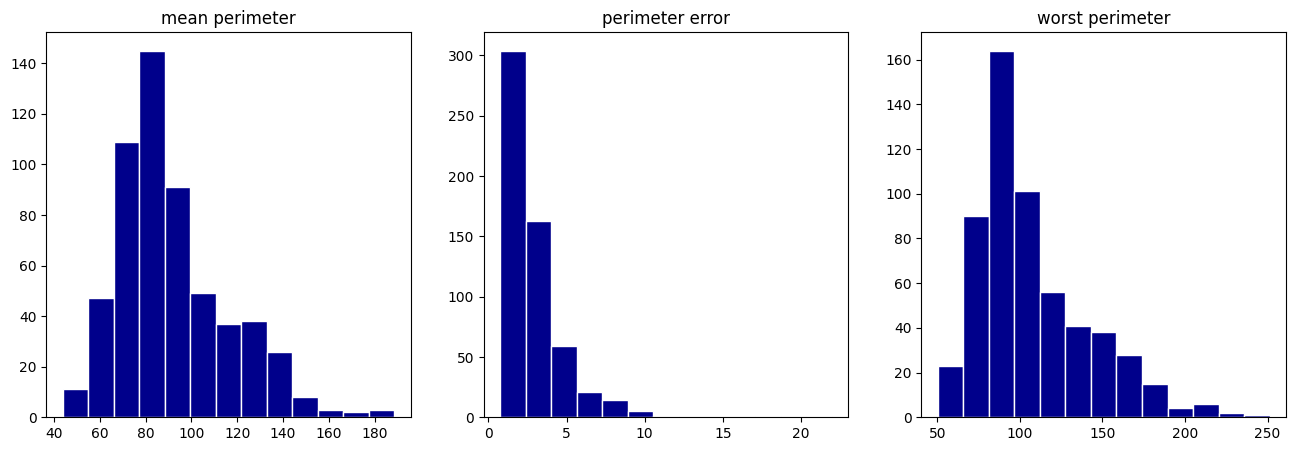

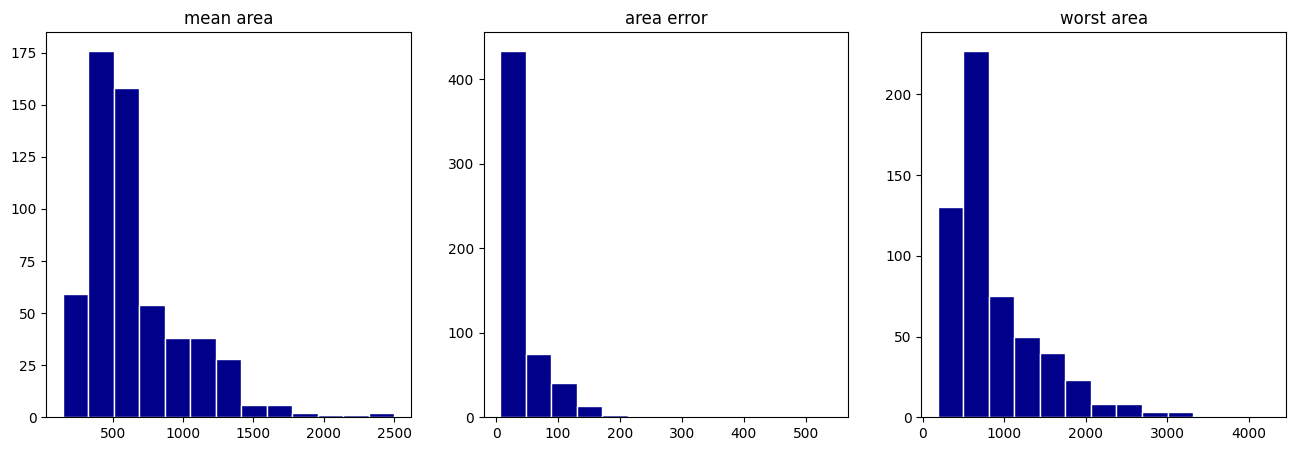

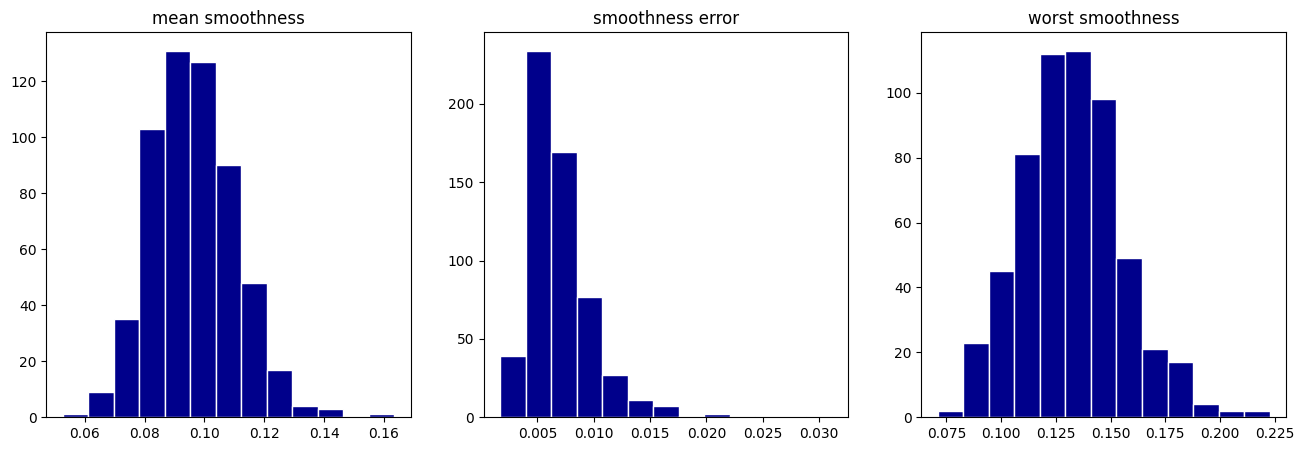

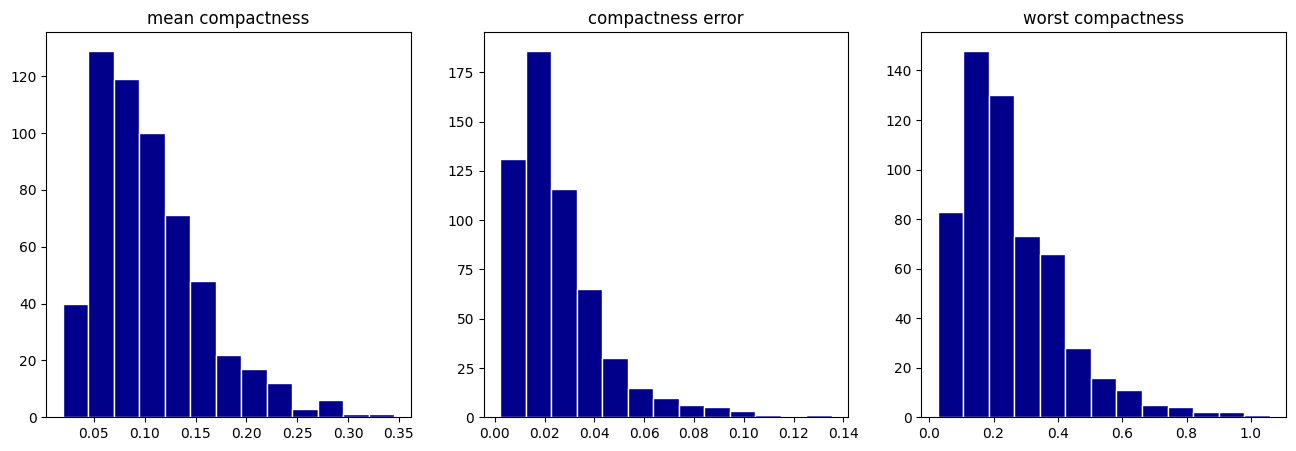

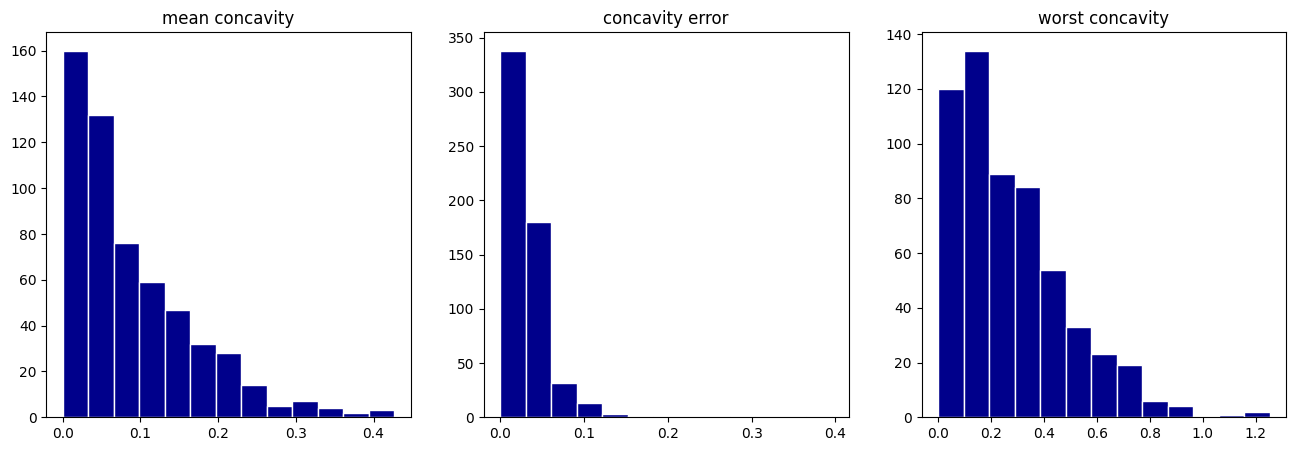

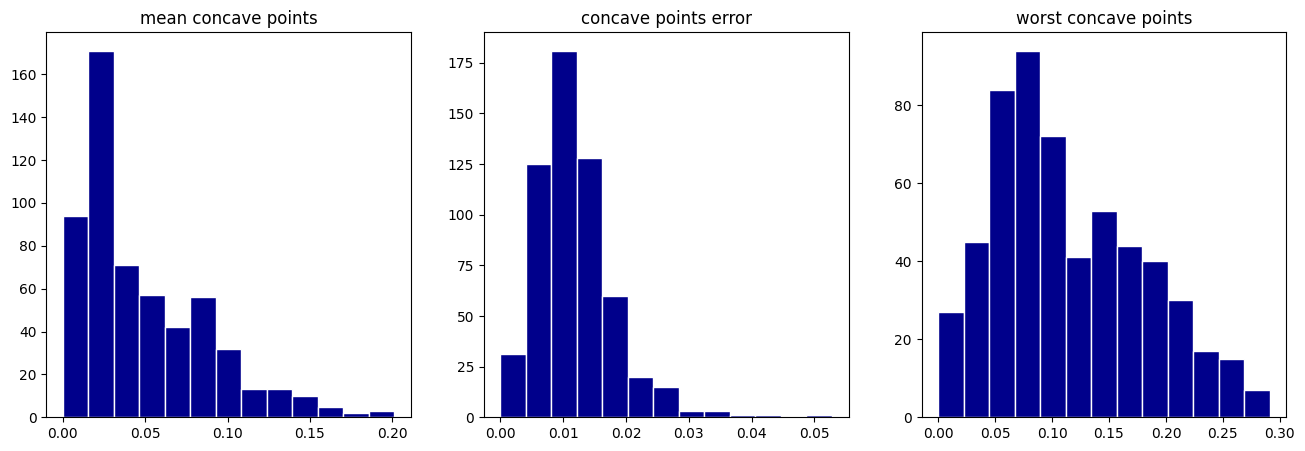

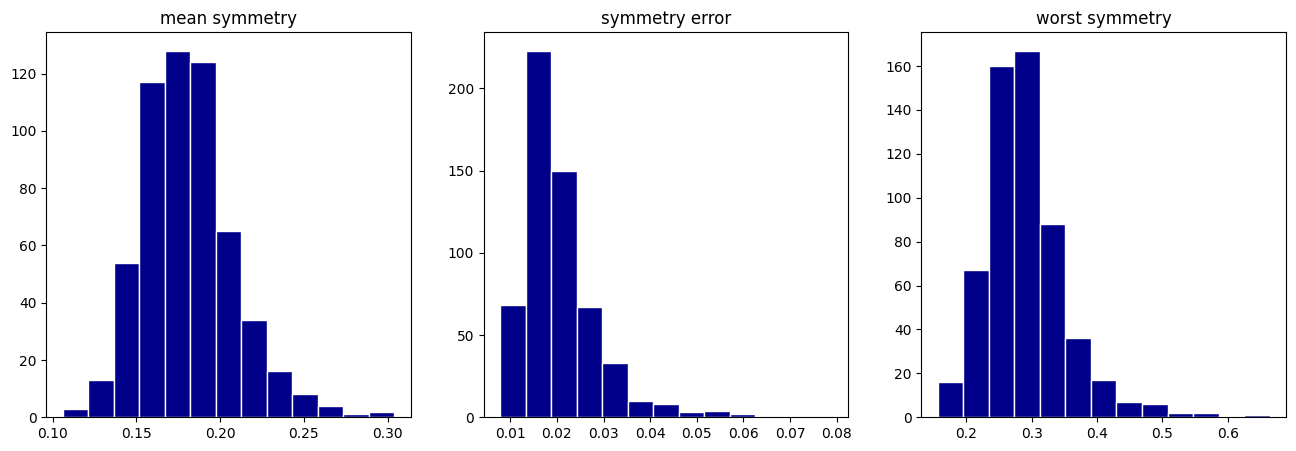

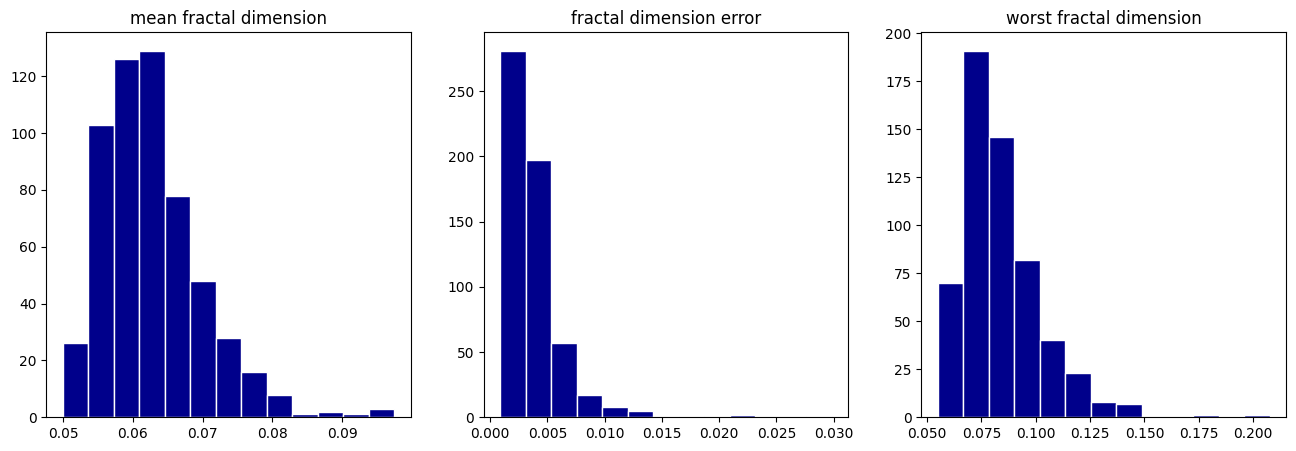

In [8]:
for i in range(10):
    mean_name = X.columns[i]
    error_name = X.columns[i+10]
    worst_name = X.columns[i+20]

    fig, ax = plt.subplots(1, 3, figsize=(16,5), sharey=False)
    
    ax[0].hist(X[mean_name], color = 'darkblue', edgecolor = 'white', bins = 13)
    ax[1].hist(X[error_name], color = 'darkblue', edgecolor = 'white', bins = 13)
    ax[2].hist(X[worst_name], color = 'darkblue', edgecolor = 'white', bins = 13)

    ax[0].set_title(mean_name)
    ax[1].set_title(error_name)
    ax[2].set_title(worst_name)

# 6 Scatter plots

To explore the features further the scatterplots of Y dependacy on various features is built. The radius features, perimeter features, and concave point features seem to be the most important

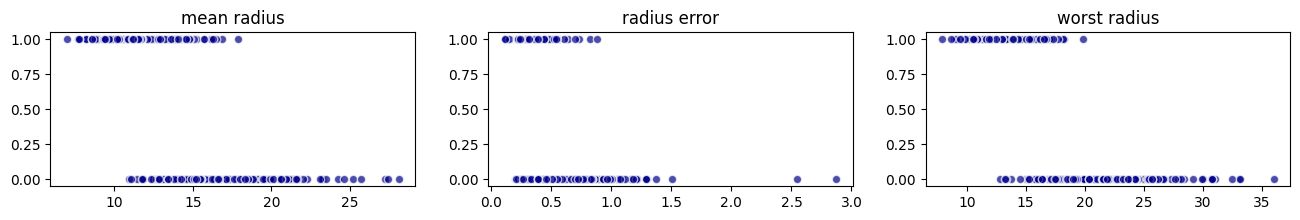

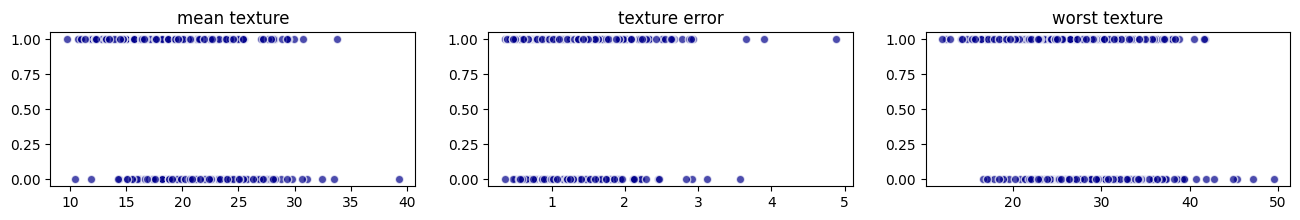

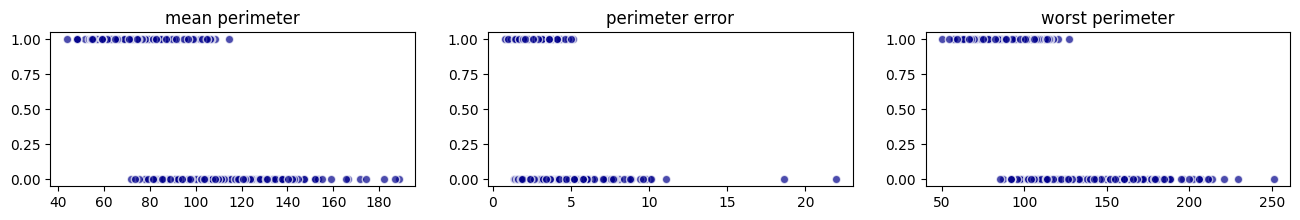

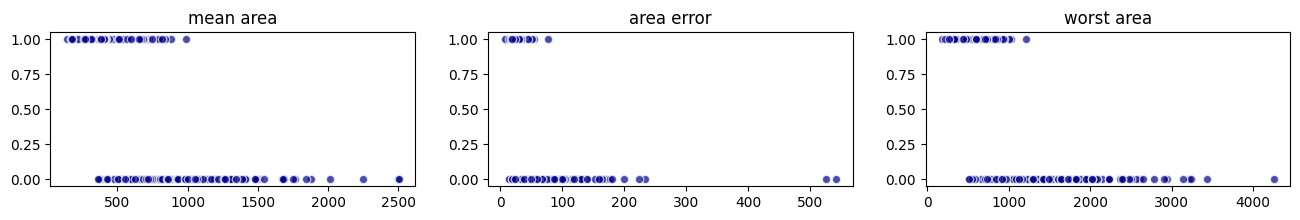

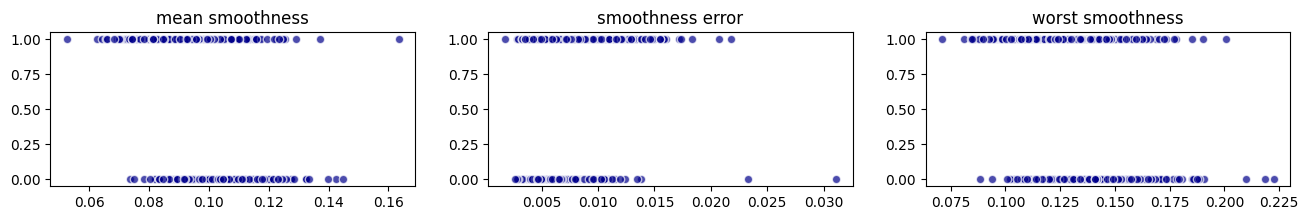

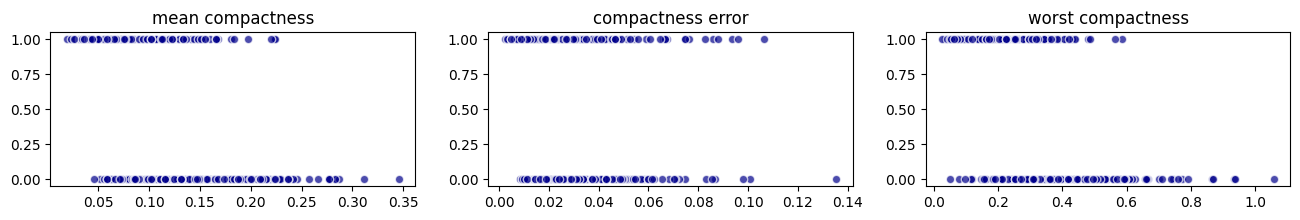

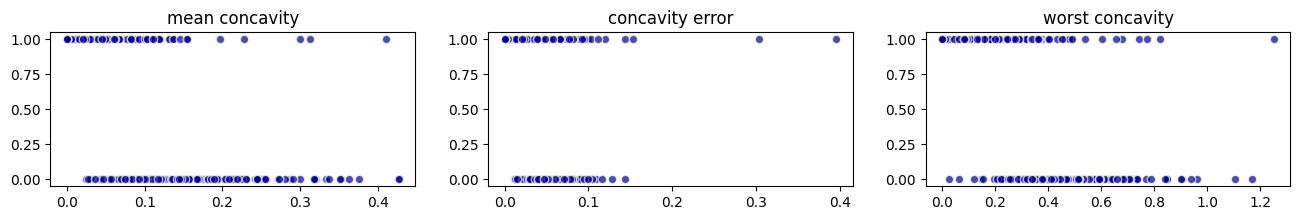

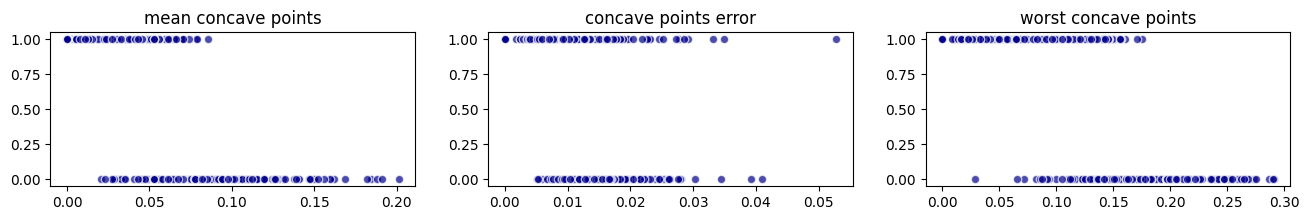

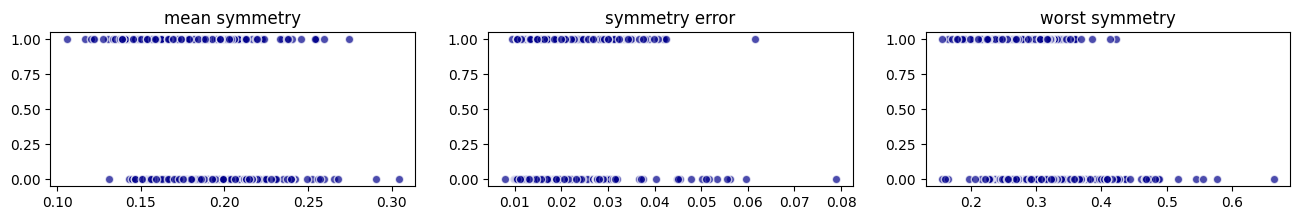

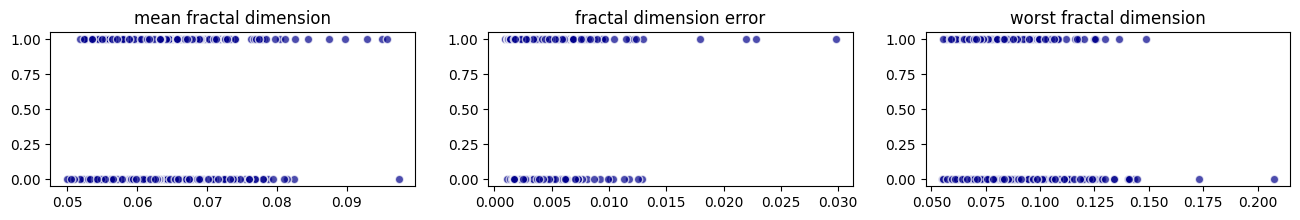

In [9]:
for i in range(10):
    mean_name = X.columns[i]
    error_name = X.columns[i+10]
    worst_name = X.columns[i+20]

    fig, ax = plt.subplots(1, 3, figsize=(16,2), sharey=False)
    
    ax[0].scatter(X[mean_name], y, color = 'darkblue', edgecolor = 'white', alpha = 0.7)
    ax[1].scatter(X[error_name],y, color = 'darkblue', edgecolor = 'white', alpha = 0.7)
    ax[2].scatter(X[worst_name],y, color = 'darkblue', edgecolor = 'white', alpha = 0.7)

    ax[0].set_title(mean_name)
    ax[1].set_title(error_name)
    ax[2].set_title(worst_name)

# 7 Missing data

Luckily there is no missing data in the dataset. Therefore, nothing to clean or drop

In [10]:
X.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [11]:
(X==0).sum(axis = 0)

mean radius                 0
mean texture                0
mean perimeter              0
mean area                   0
mean smoothness             0
mean compactness            0
mean concavity             13
mean concave points        13
mean symmetry               0
mean fractal dimension      0
radius error                0
texture error               0
perimeter error             0
area error                  0
smoothness error            0
compactness error           0
concavity error            13
concave points error       13
symmetry error              0
fractal dimension error     0
worst radius                0
worst texture               0
worst perimeter             0
worst area                  0
worst smoothness            0
worst compactness           0
worst concavity            13
worst concave points       13
worst symmetry              0
worst fractal dimension     0
dtype: int64

13 observations on cancativity have values of 0. Replace them with median values.

Also could train linearn regression on other parameters to fit these values

In [12]:
X.loc[X['mean concavity']==0,'mean concavity'] = X['mean concavity'].median()
X.loc[X['mean concave points']==0,'mean concave points'] = X['mean concave points'].median()

X.loc[X['concavity error']==0,'concavity error'] = X['concavity error'].median()
X.loc[X['concave points error']==0,'concave points error'] = X['concave points error'].median()

X.loc[X['worst concavity']==0,'worst concavity'] = X['worst concavity'].median()
X.loc[X['worst concave points']==0,'worst concave points'] = X['worst concave points'].median()

# 8 Standardisation 

To make sure that all features have the same size standardisation is performed. It helps to run Ridge Logistic Regressions, Lasso Logistic Regressions, and other linear classification algorithms correctly.

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [14]:
X_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.670208,2.555450,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.125992,2.344421,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.042049,0.537385,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.174998,1.090996,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363694,2.051786,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.846577,1.990810,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.923447,1.456309,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,2.003677,2.219710,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371327,1.432700,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.599990,0.720020,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.955251,2.340344,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.652341,1.652985,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.684357,1.265074,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.215921,0.724756,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.029319,0.087498,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.307902,0.393245,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.322829,2.683989,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.235634,2.338106,1.919083,2.219635


# 11.1 Train test split
## (10 & 9 will follow 11)

The dataset is divided onto train and test set so that test set takes 20% of the real dataset. This is done before 10 and 9 questions, because choosing features and PCA are parts of the future models that will be used later on.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=420)

# 11.2 Prepare dataset for results

Results of models will be saved to this dataset. Train and test accuracy, precision, recall, F1-score will be preserved to this dataset

In [16]:
results = pd.DataFrame(columns = ['train_accuracy','test_accuracy',
                                  'train_precision','test_precision', 
                                  'train_recall','test_recall',
                                  'train_F1-Score','test_F1-Score'])

In [17]:
def plot_confusion_matrix(y_true, y_pred, labels=None, title='Confusion Matrix'):
    """
    This function generates confusion matrix
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [18]:
def add_model_to_results(model_name: str,
                         y_train,
                         y_test,
                         y_predicted_train,
                         y_predicted_test):
    """
    This function adds scores for model validation to the results dataset
    """
    results.loc[model_name,'train_accuracy'] = accuracy_score(y_train, y_predicted_train)
    results.loc[model_name,'test_accuracy'] = accuracy_score(y_test, y_predicted_test)

    results.loc[model_name,'train_precision'] = precision_score(y_train, y_predicted_train)
    results.loc[model_name,'test_precision'] = precision_score(y_test, y_predicted_test)
    
    results.loc[model_name,'train_recall'] = recall_score(y_train, y_predicted_train)
    results.loc[model_name,'test_recall'] = recall_score(y_test, y_predicted_test)

    results.loc[model_name,'train_F1-Score'] = roc_auc_score(y_train, y_predicted_train)
    results.loc[model_name,'test_F1-Score'] = roc_auc_score(y_test, y_predicted_test)

    print('test F1-score:' + str(np.round(results.loc[model_name,'test_F1-Score'],3)))
    print('test recall:' + str(np.round(results.loc[model_name,'test_recall'],3)))
    
    plot_confusion_matrix(y_train, y_predicted_train, labels=None, title=' Train Confusion Matrix')
    plot_confusion_matrix(y_test, y_predicted_test, labels=None, title=' Test Confusion Matrix');

# (9 & 12 & 13 & 14).1 Choosing features through correlation analysis

Find Absolute correlation values of features with target. Concave points, worst perimeter and radius that stand for unequal shape of breasts seem to be the most important. Then cut a half of the least important features

radius error               0.115464
perimeter error            0.105676
mean concave points        0.097869
smoothness error           0.093351
area error                 0.090169
mean concavity             0.080148
concave points error       0.072940
mean symmetry              0.071661
worst concave points       0.067575
mean compactness           0.067548
mean area                  0.054318
worst perimeter            0.051492
mean perimeter             0.050192
worst area                 0.046734
worst radius               0.045564
mean radius                0.044652
worst concavity            0.042283
worst smoothness           0.037048
mean smoothness            0.034746
compactness error          0.028301
worst compactness          0.027200
mean texture               0.023516
worst symmetry             0.021997
concavity error            0.017677
symmetry error             0.016770
worst fractal dimension    0.015422
fractal dimension error    0.008879
texture error              0

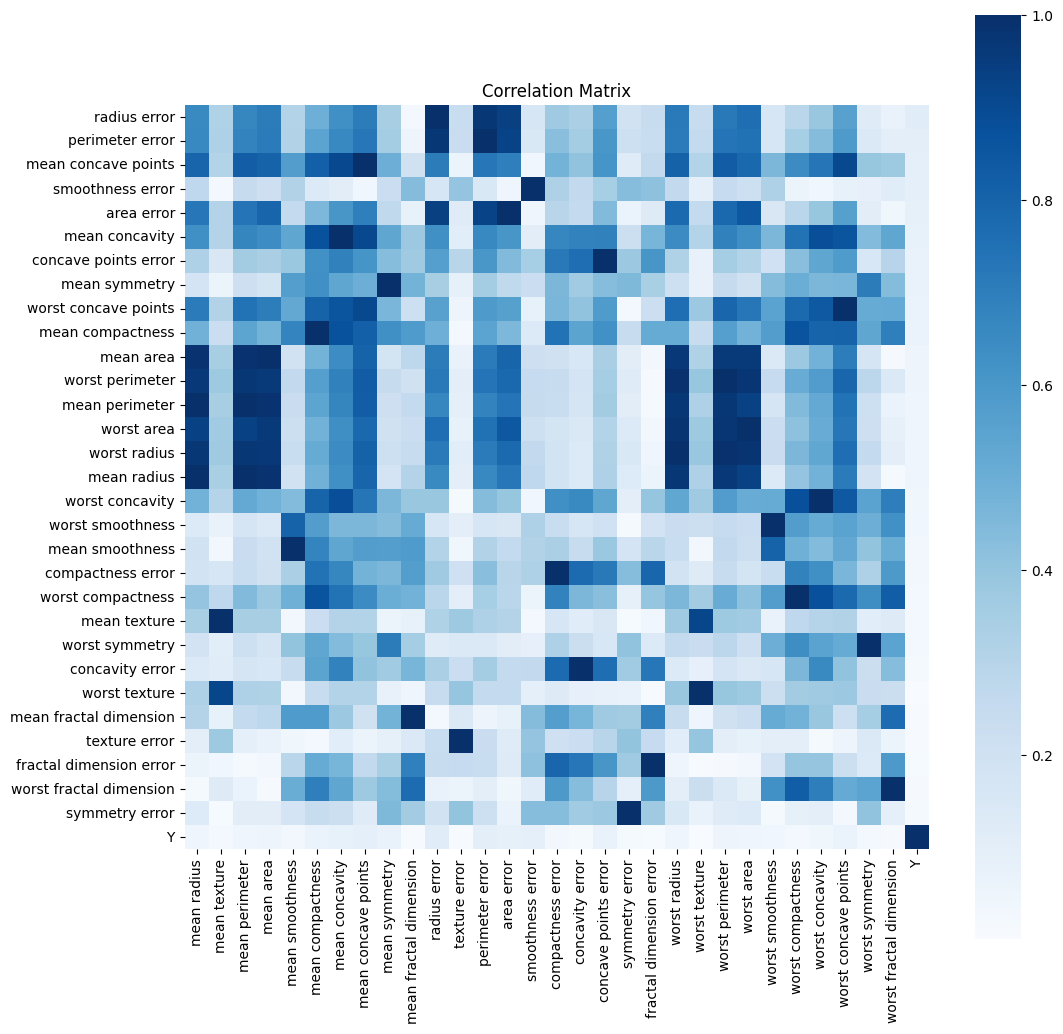

In [19]:
y_dataset_train = pd.DataFrame(y_train, columns = ['Y'])

plt.figure(figsize = (12,12))
sns.heatmap(np.abs(pd.concat([X_train, y_dataset_train],axis = 1).corr().sort_values(by = 'Y')), cmap = 'Blues', square = True)
plt.title('Correlation Matrix');

display(np.abs(pd.concat([X_train, y_dataset_train],axis = 1).corr()['Y']).sort_values()[::-1][1:])
features_selected_via_correlation = list(np.abs(pd.concat([X_train, y_dataset_train], axis = 1).corr()['Y']).sort_values()[::-1][1:16].index)

GridsearchCV is run through different hyperparameters of Logistic Regression to satisfy #12 and #13 tasks. The estimator for the gridsearch is F1-score that is the most useful method for unbalanced datasets. Alternatively I would suggest using F-score with increased value of recall (because undetecting cancer is worse than making a false positive).

In [20]:
# for this and all future Logistic Regressions random state is fixed
lr = LogisticRegression(random_state = 2, solver = 'saga',max_iter = 10000)
param_grid = {'penalty':['l2','l1',None], 'C' : [0.01,0.1,1,10]}
gridsearcher = GridSearchCV(lr, param_grid, scoring='f1', n_jobs=-1,cv = 5)
gridsearcher.fit(X_train[features_selected_via_correlation],y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=2,
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['l2', 'l1', None]},
             scoring='f1')

Filter results of the GridSearch so that the best model is at the top

In [21]:
pd.DataFrame(gridsearcher.cv_results_).sort_values(by = 'mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.026435,0.010897,0.002325,0.001182,1,l2,"{'C': 1, 'penalty': 'l2'}",0.949153,0.966102,0.965517,0.974359,0.974359,0.965898,0.009206,1
10,0.258929,0.101613,0.002024,0.000542,10,l1,"{'C': 10, 'penalty': 'l1'}",0.941176,0.982759,0.964912,0.974359,0.965517,0.965745,0.013914,2
9,0.081494,0.037482,0.004172,0.002178,10,l2,"{'C': 10, 'penalty': 'l2'}",0.941176,0.982759,0.964912,0.974359,0.957265,0.964094,0.014327,3
2,0.263042,0.059384,0.003857,0.004856,0.01,None,"{'C': 0.01, 'penalty': None}",0.923077,0.982759,0.964912,0.974359,0.965517,0.962125,0.020589,4
5,0.273244,0.061294,0.002600,0.001003,0.1,None,"{'C': 0.1, 'penalty': None}",0.923077,0.982759,0.964912,0.974359,0.965517,0.962125,0.020589,4
8,0.259223,0.041778,0.001632,0.000273,1,None,"{'C': 1, 'penalty': None}",0.923077,0.982759,0.964912,0.974359,0.965517,0.962125,0.020589,4
11,0.245983,0.049840,0.003079,0.002050,10,None,"{'C': 10, 'penalty': None}",0.923077,0.982759,0.964912,0.974359,0.965517,0.962125,0.020589,4
7,0.194458,0.119947,0.003992,0.002312,1,l1,"{'C': 1, 'penalty': 'l1'}",0.931034,0.974359,0.965517,0.965517,0.966102,0.960506,0.015113,8
4,0.095997,0.018541,0.002768,0.001623,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.957983,0.950000,0.974359,0.941176,0.966102,0.957924,0.011664,9
3,0.007829,0.003582,0.003180,0.003023,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.940171,0.950820,0.965517,0.942149,0.949153,0.949562,0.008938,10


C = 10 and L2 peatly are the best => try this model on test

In [22]:
lr = LogisticRegression(random_state = 2, solver = 'saga', C = 10, penalty = 'l2',max_iter = 10000)
lr.fit(X_train[features_selected_via_correlation], y_train)
y_pred_train = lr.predict(X_train[features_selected_via_correlation])
y_pred_test = lr.predict(X_test[features_selected_via_correlation])

Draw confusion matrix calculate performance metrics

test F1-score:0.942
test recall:0.971


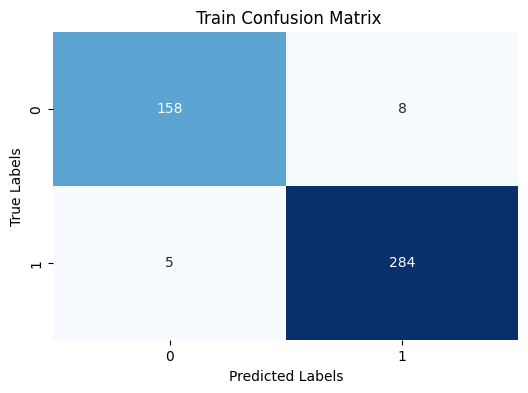

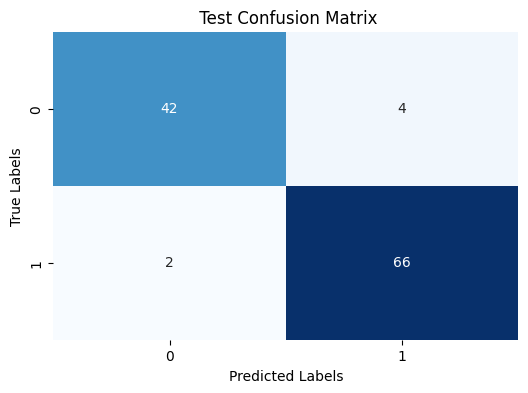

In [23]:
add_model_to_results('lr_correlations',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

The model is very good, it has some False Positives and 1 False Negative. Ideally it should have removed the False Negative to have recall = 1

# (9 & 12 & 13 & 14).2 Mutual Information Feature Selection

Find all features with highest mutual information and cut the best 15 features. Then build the model

In [24]:
mi = mutual_info_classif(X_train, y_train)

mi_df = pd.DataFrame({
    'Feature': [f'{X_train.columns[i]}' for i in range(X_train.shape[1])],
    'Mutual_Information': mi
})

mi_df.sort_values(by = 'Mutual_Information', ascending = False)

,Feature,Mutual_Information
22,worst perimeter,0.474278
23,worst area,0.471597
20,worst radius,0.448792
7,mean concave points,0.427685
27,worst concave points,0.421018
2,mean perimeter,0.390276
3,mean area,0.367992
0,mean radius,0.367133
6,mean concavity,0.348967
13,area error,0.339263


In [25]:
mi_features_selected = list(mi_df.sort_values(by = 'Mutual_Information', ascending = False).iloc[:15,:].Feature)

In [26]:
set(mi_features_selected).intersection(set(features_selected_via_correlation))

{'area error',
 'mean area',
 'mean compactness',
 'mean concave points',
 'mean concavity',
 'mean perimeter',
 'perimeter error',
 'radius error',
 'worst area',
 'worst concave points',
 'worst perimeter',
 'worst radius'}

12 features are the same as in the case with correlations. Therefore, the mutual information approach and the correlation approach are similar

In [27]:
lr = LogisticRegression(random_state = 2, solver = 'saga',max_iter = 10000)
param_grid = {'penalty':['l2','l1',None], 'C' : [0.01,0.1,1,10]}
gridsearcher = GridSearchCV(lr, param_grid, scoring='f1', n_jobs=-1,cv = 5)
gridsearcher.fit(X_train[mi_features_selected],y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=2,
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['l2', 'l1', None]},
             scoring='f1')

In [28]:
pd.DataFrame(gridsearcher.cv_results_).sort_values(by = 'mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.033462,0.013916,0.008502,0.009074,1,l2,"{'C': 1, 'penalty': 'l2'}",0.948276,0.974359,0.956522,0.974359,0.957265,0.962156,0.010451,1
9,0.120058,0.043923,0.006961,0.009041,10,l2,"{'C': 10, 'penalty': 'l2'}",0.921739,0.982759,0.973913,0.974359,0.956522,0.961858,0.021801,2
2,0.393757,0.079783,0.005691,0.003935,0.01,None,"{'C': 0.01, 'penalty': None}",0.923077,0.982759,0.965517,0.974359,0.955752,0.960293,0.020666,3
5,0.371074,0.098338,0.002872,0.000865,0.1,None,"{'C': 0.1, 'penalty': None}",0.923077,0.982759,0.965517,0.974359,0.955752,0.960293,0.020666,3
8,0.352425,0.079573,0.002077,0.000723,1,None,"{'C': 1, 'penalty': None}",0.923077,0.982759,0.965517,0.974359,0.955752,0.960293,0.020666,3
11,0.250372,0.071486,0.001559,0.000101,10,None,"{'C': 10, 'penalty': None}",0.923077,0.982759,0.965517,0.974359,0.955752,0.960293,0.020666,3
10,0.313686,0.066474,0.002963,0.001499,10,l1,"{'C': 10, 'penalty': 'l1'}",0.913793,0.982759,0.965517,0.974359,0.964912,0.960268,0.024139,7
4,0.119720,0.063815,0.002238,0.000652,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.957983,0.950000,0.983051,0.941176,0.966102,0.959662,0.014328,8
7,0.239657,0.082986,0.002698,0.001579,1,l1,"{'C': 1, 'penalty': 'l1'}",0.929825,0.965517,0.965517,0.965517,0.957265,0.956728,0.013826,9
3,0.006604,0.002098,0.002163,0.001140,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.949153,0.958678,0.956522,0.942149,0.940171,0.949334,0.007411,10


The best models is C = 1 with L2 penatly

In [29]:
lr = LogisticRegression(random_state = 2, solver = 'saga', C = 1, penalty = 'l2',max_iter = 10000)
lr.fit(X_train[mi_features_selected], y_train)
y_pred_train = lr.predict(X_train[mi_features_selected])
y_pred_test = lr.predict(X_test[mi_features_selected])

test F1-score:0.934
test recall:0.956


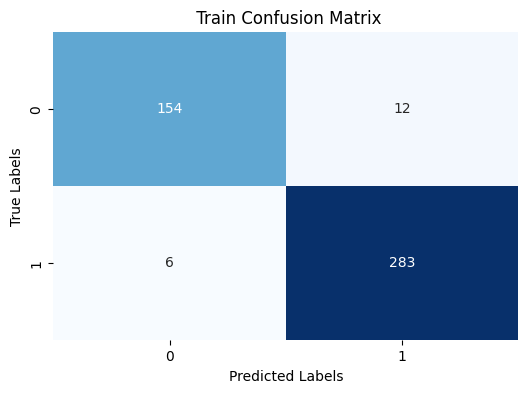

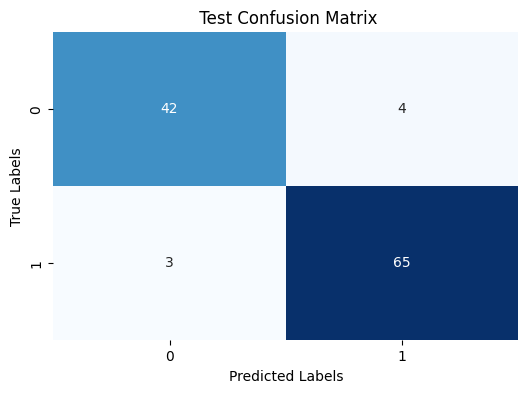

In [30]:
add_model_to_results('lr_mutual_information',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

The model is good, but it is actually slightly worse than the first model. Therefore, mutual information is not as powerful as correlations in for this dataset

# (9 & 12 & 13 & 14).3 Recursive Feature Elimination

A pipeline of RFE and LR has to be created for this method to run gridsearch correctly. Apart from typical LR hyperparameters the number of features to select by RFE is also fed to the Gridsearch cross-validation.

It is a bit slow, because RFE runs regression N_features_initialluy-N_features_to_leave while gridsearch runs each of 4 RFEs 5 times. Therefore, complexity rises significantly relative to the previous Gridsearches

In [31]:
lr = LogisticRegression(random_state = 2, solver = 'saga',max_iter = 10000)
rfe = RFE(estimator=lr)
pipeline = Pipeline([
    ('rfe', rfe),
    ('log_reg', lr)
])

param_grid = {
    'rfe__n_features_to_select': [10, 15, 20, 25],  # Number of features to select in RFE
    'log_reg__C': [0.01,0.1,1,10],  # Regularization parameter for logistic regression
    'log_reg__penalty': ['l2','l1',None],  # Penalty type (L1 or L2 regularization)
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1', n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfe',
                                        RFE(estimator=LogisticRegression(max_iter=10000,
                                                                         random_state=2,
                                                                         solver='saga'))),
                                       ('log_reg',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=2,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.01, 0.1, 1, 10],
                         'log_reg__penalty': ['l2', 'l1', None],
                         'rfe__n_features_to_select': [10, 15, 20, 25]},
             scoring='f1')

In [32]:
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_log_reg__C,param_log_reg__penalty,param_rfe__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,0.545532,0.091455,0.002773,0.001232,1,l2,20,"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'r...",0.974359,0.957265,1.000000,0.991304,0.982759,0.981137,0.014681,1
14,0.514612,0.092047,0.002951,0.002062,0.1,l2,20,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",0.974359,0.966102,1.000000,0.974790,0.982759,0.979602,0.011480,2
13,0.631781,0.127689,0.002502,0.002278,0.1,l2,15,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",0.974359,0.966102,1.000000,0.974790,0.982759,0.979602,0.011480,2
15,0.322721,0.051216,0.002103,0.000576,0.1,l2,25,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",0.974359,0.966102,0.991453,0.974790,0.991304,0.979602,0.010102,4
27,0.378311,0.053276,0.003216,0.001529,1,l2,25,"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'r...",0.974359,0.957265,1.000000,0.991304,0.974359,0.979457,0.014878,5
37,0.725783,0.121565,0.003732,0.004298,10,l2,15,"{'log_reg__C': 10, 'log_reg__penalty': 'l2', '...",0.983051,0.965517,0.991304,0.982456,0.974359,0.979338,0.008746,6
38,0.658067,0.147097,0.002755,0.001778,10,l2,20,"{'log_reg__C': 10, 'log_reg__penalty': 'l2', '...",0.974359,0.973913,0.991304,0.982456,0.974359,0.979278,0.006810,7
25,0.718461,0.111970,0.003907,0.002716,1,l2,15,"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'r...",0.974359,0.966102,0.991304,0.982759,0.974359,0.977777,0.008573,8
41,0.960816,0.178033,0.003034,0.001588,10,l1,15,"{'log_reg__C': 10, 'log_reg__penalty': 'l1', '...",0.974790,0.965517,1.000000,0.973451,0.974359,0.977623,0.011691,9
24,0.781690,0.118879,0.003554,0.001810,1,l2,10,"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'r...",0.966102,0.966102,0.991453,0.973913,0.982759,0.976066,0.009846,10


The best model has C=10, L2 penalty and 20 features to select from RFA

In [33]:
lr = LogisticRegression(random_state = 2, solver = 'saga', C = 10, penalty = 'l2',max_iter = 10000)
rfe = RFE(estimator=lr, n_features_to_select = 20)
rfe.fit(X_train, y_train)
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

test F1-score:0.967
test recall:1.0


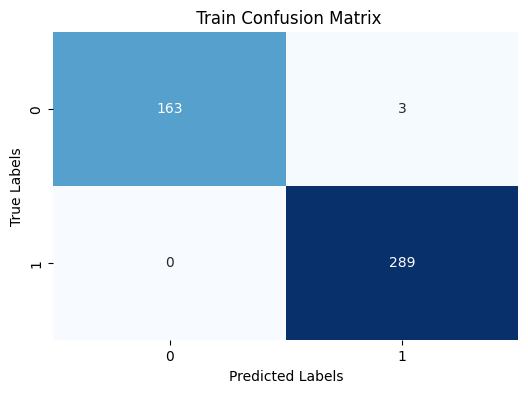

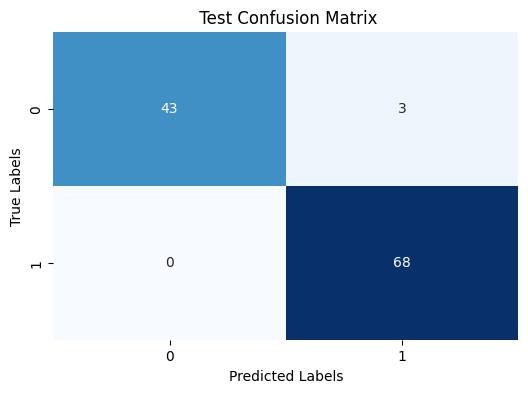

In [34]:
add_model_to_results('lr_RFA',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

The model is the best of what was found before. It has recall = 1 on test and several less FP. The model success accounts for the number of features used - 20. Before only 15 were left using the correlations method. Therefore, RFA is more powerful than correlations

# (10 & 12 & 13 & 14) PCA

Now go to question 10. Use PCA. Find optimal number of components for PCA

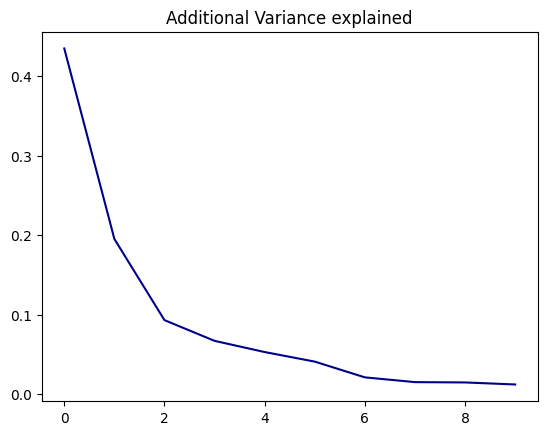

In [35]:
pca = PCA(n_components=10)
pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_, color = 'darkblue')
plt.title('Additional Variance explained');

Looks like the major part of the variance (90%) can be explained with 4 features in PCA. => TAKE 5 FEATURES

In [36]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [37]:
lr = LogisticRegression(random_state = 2, solver = 'saga',max_iter = 10000)
param_grid = {'penalty':['l2','l1',None], 'C' : [0.01,0.1,1,10]}
gridsearcher = GridSearchCV(lr, param_grid, scoring='f1', n_jobs=-1,cv = 5)
gridsearcher.fit(X_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=2,
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['l2', 'l1', None]},
             scoring='f1')

In [38]:
pd.DataFrame(gridsearcher.cv_results_).sort_values(by = 'mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.010981,0.006095,0.001388,0.000609,1,l1,"{'C': 1, 'penalty': 'l1'}",0.982759,0.974359,1.000000,0.974359,0.991304,0.984556,0.009952,1
6,0.004560,0.001291,0.001279,0.000976,1,l2,"{'C': 1, 'penalty': 'l2'}",0.982759,0.974359,1.000000,0.966102,0.991304,0.982905,0.011985,2
2,0.014163,0.004061,0.001681,0.001020,0.01,None,"{'C': 0.01, 'penalty': None}",0.982759,0.974359,0.982456,0.991304,0.982759,0.982727,0.005360,3
5,0.013661,0.006090,0.001289,0.000635,0.1,None,"{'C': 0.1, 'penalty': None}",0.982759,0.974359,0.982456,0.991304,0.982759,0.982727,0.005360,3
8,0.012938,0.005429,0.001062,0.000587,1,None,"{'C': 1, 'penalty': None}",0.982759,0.974359,0.982456,0.991304,0.982759,0.982727,0.005360,3
11,0.010302,0.002017,0.000951,0.000291,10,None,"{'C': 10, 'penalty': None}",0.982759,0.974359,0.982456,0.991304,0.982759,0.982727,0.005360,3
9,0.015664,0.005969,0.000889,0.000075,10,l2,"{'C': 10, 'penalty': 'l2'}",0.982759,0.974359,0.982456,0.982759,0.982759,0.981018,0.003332,7
10,0.015067,0.003261,0.001006,0.000386,10,l1,"{'C': 10, 'penalty': 'l1'}",0.982759,0.974359,0.982456,0.982759,0.982759,0.981018,0.003332,7
3,0.001449,0.000188,0.000778,0.000059,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.974359,0.957983,1.000000,0.974790,0.991304,0.979687,0.014636,9
4,0.002138,0.000933,0.000787,0.000086,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.973913,0.950000,0.982456,0.974790,0.973913,0.971014,0.010987,10


Best model has C = 1 and l2 regularization

In [39]:
lr = LogisticRegression(random_state = 2, solver = 'saga', C = 1, penalty = 'l2',max_iter = 10000)
lr.fit(X_train_pca, y_train)
y_pred_train = lr.predict(X_train_pca)
y_pred_test = lr.predict(X_test_pca)

test F1-score:0.96
test recall:0.985


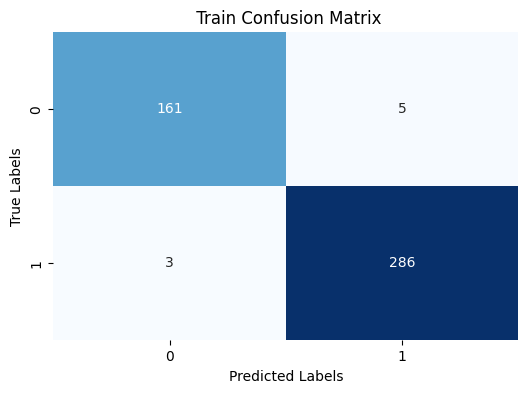

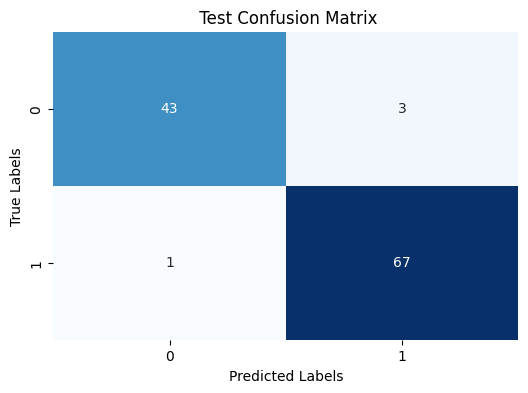

In [40]:
add_model_to_results('lr_PCA',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

The model performs very well, but worse than RFE approach. There is again that case with 1 FN and 4 FP

# 15 Models' comparison

### General discussion

To determine the best model the results are filtered by F1 score on train. The highest F1 score represents the best model. Because the Cross-Validation was used correctly the highest F1 on test of the best model on train is also the highest. Additionally, the recall of the models on train and test also tends to decrease with F1 score decreasing. This metric is very important fo the medical datasets, therefore, the result obtained is alredy satisfactory.

The best model is RFA. Through many iterations of Gridsearch it found the best number of features and the most important features for the regression. Because this model iterated through all relevant compbination of features it is dominating the regressions based solely on correlations and on mutual information.

PCA is another powerful method to reduce dimensionality of the dataset. It squeezes all features into several other ortogonal features and, therefore, contains more information than 15 chosen features based on correlations or mutual information on their own.

Finally, correlations of features with the target variable dominate mutual information criterion. This is a surprising result, because usually entropy is a better method for choosing features than correlation in classification problems.

### Trade-offs

As in all typical classification models, the trade-off is between precision and recall. The higher precision is, the lower recall is likely to be. In this case the main metric to optimise is recall. Therefore, precision should be sacrofices. It is a lot more important to find all cancer cases than raise a false alert. In question 16 optimal treshold on train are determined so that recall on train is equal to 1. After that results on test are observed

In [41]:
results.sort_values(by = 'train_F1-Score', ascending = False)

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_F1-Score,test_F1-Score
lr_RFA,0.993407,0.973684,0.989726,0.957746,1.0,1.0,0.990964,0.967391
lr_PCA,0.982418,0.964912,0.982818,0.957143,0.989619,0.985294,0.979749,0.960038
lr_correlations,0.971429,0.947368,0.972603,0.942857,0.982699,0.970588,0.967253,0.941816
lr_mutual_information,0.96044,0.938596,0.959322,0.942029,0.979239,0.955882,0.953475,0.934463


# 16.1 Treshold adjustment for correlations-based LR

### Rationale:

It is crucial to have recall 1 => using each best-in-class model find the highest possible trhold that gives recall = 1 on the train set and apply this treshold to test

In [42]:
lr = LogisticRegression(random_state = 2, solver = 'saga', C = 10, penalty = 'l2',max_iter = 10000)
lr.fit(X_train[features_selected_via_correlation], y_train)
y_pred_train_proba = lr.predict_proba(X_train[features_selected_via_correlation])[:,1]

In [43]:
def PR_curve(y_train,y_pred_train_proba, graph_name = 'Precision-Recall Curve'):
    """
    This function draws PR curve and finds the optimal treshold where recall is the highest
    """
    precision, recall, thresholds = precision_recall_curve(y_train, y_pred_train_proba)
    
    # Calculate the Area Under the Curve (AUC)
    pr_auc = auc(recall, precision)

    # optimal treshold is the smallest treshold that has the highest recall
    optimal_treshold_position = len(recall) - recall[::-1].argmax()-1
    optimal_treshold = thresholds[optimal_treshold_position]
    optimal_recall = recall[optimal_treshold_position]
    optimal_precision = precision[optimal_treshold_position]
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.4f})', color = 'darkblue')
    plt.scatter(optimal_recall, optimal_precision, color = 'darkred', label = f'optimal treshold: {optimal_treshold}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(graph_name)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

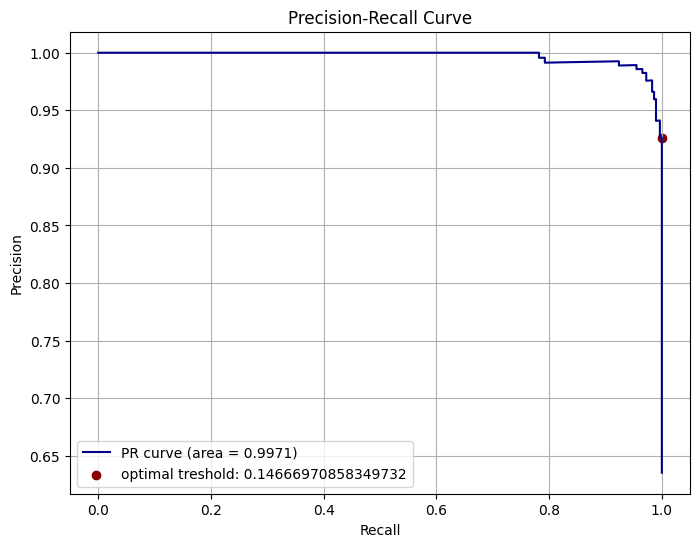

In [44]:
PR_curve(y_train,y_pred_train_proba, graph_name = 'Precision-Recall Curve')

Now feed this optimal treshold to the test set

In [45]:
y_pred_train = (y_pred_train_proba > 0.135).astype(np.int64)
y_pred_test_proba = lr.predict_proba(X_test[features_selected_via_correlation])[:,1]
y_pred_test = (y_pred_test_proba > 0.135).astype(np.int64)

test F1-score:0.917
test recall:0.985


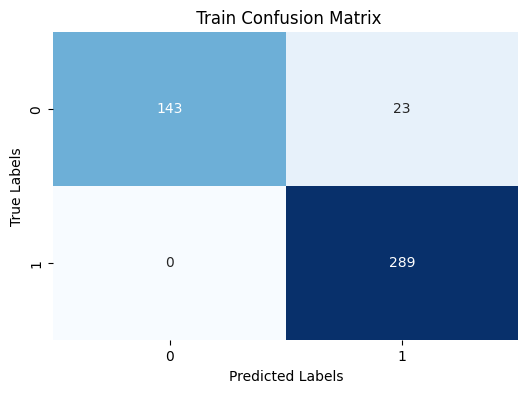

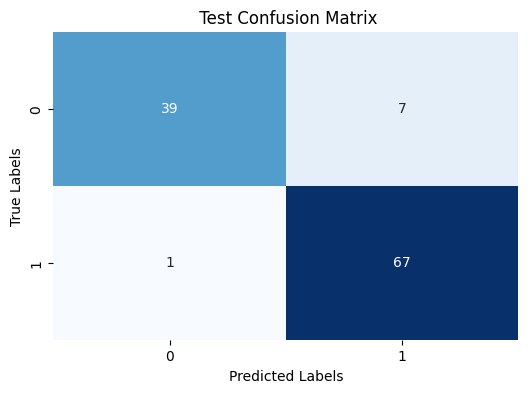

In [46]:
add_model_to_results('lr_correlations_optimal',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

# 16.2 Treshold adjustment for MI-based LR

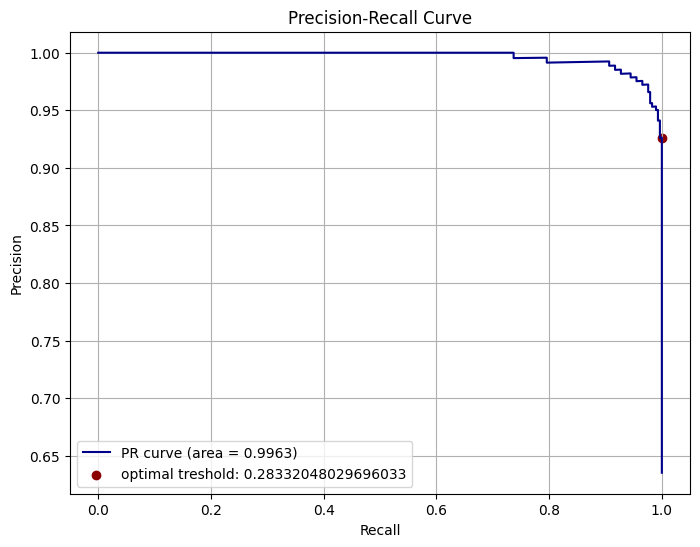

In [47]:
lr = LogisticRegression(random_state = 2, solver = 'saga', C = 1, penalty = 'l2',max_iter = 10000)
lr.fit(X_train[mi_features_selected], y_train)
y_pred_train_proba = lr.predict_proba(X_train[mi_features_selected])[:,1]
PR_curve(y_train,y_pred_train_proba, graph_name = 'Precision-Recall Curve')

test F1-score:0.938
test recall:0.985


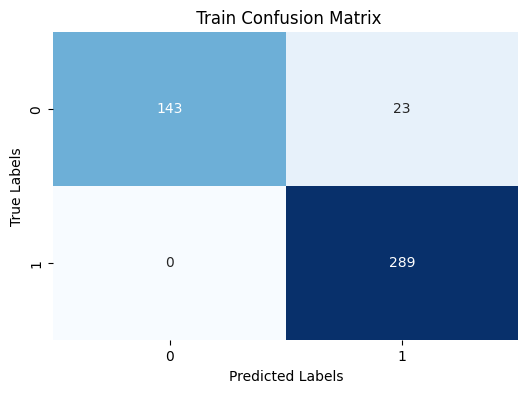

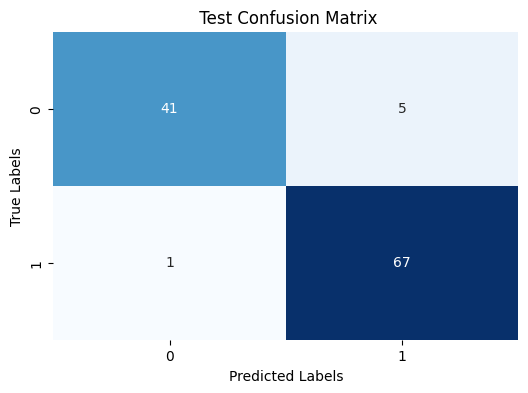

In [48]:
y_pred_train = (y_pred_train_proba > 0.28).astype(np.int64)
y_pred_test_proba = lr.predict_proba(X_test[mi_features_selected])[:,1]
y_pred_test = (y_pred_test_proba > 0.28).astype(np.int64)

add_model_to_results('lr_mutual_information_optimal',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

# 16.3 Treshold adjustment for RFE-based LR

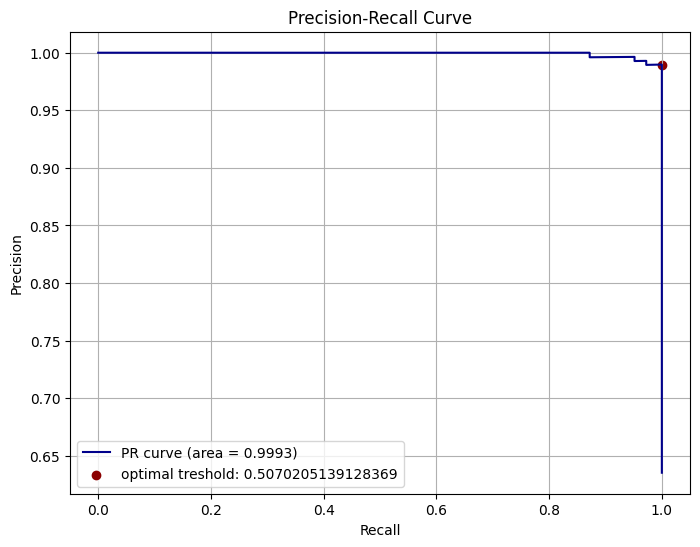

In [49]:
lr = LogisticRegression(random_state = 2, solver = 'saga', C = 10, penalty = 'l2',max_iter = 10000)
rfe = RFE(estimator=lr, n_features_to_select = 20)
rfe.fit(X_train, y_train)
y_pred_train_proba = rfe.predict_proba(X_train)[:,1]
PR_curve(y_train,y_pred_train_proba, graph_name = 'Precision-Recall Curve')

test F1-score:0.967
test recall:1.0


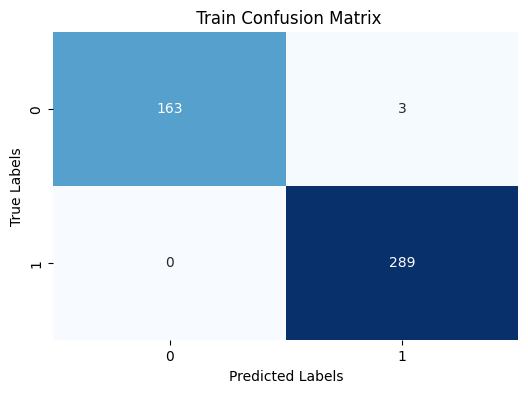

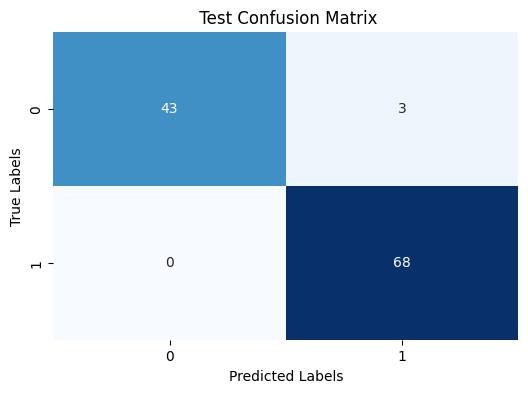

In [50]:
y_pred_train = (y_pred_train_proba > 0.475).astype(np.int64)
y_pred_test_proba = rfe.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_test_proba > 0.475).astype(np.int64)

add_model_to_results('lr_RFE_optimal',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

# 16.4 Treshold adjustment for PCA-based LR

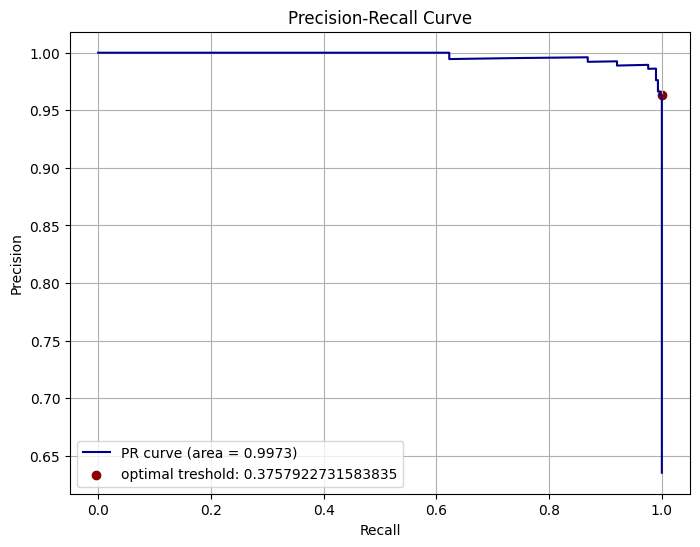

In [51]:
lr = LogisticRegression(random_state = 2, solver = 'saga', C = 1, penalty = 'l2',max_iter = 10000)
lr.fit(X_train_pca, y_train)
y_pred_train_proba = lr.predict_proba(X_train_pca)[:,1]
PR_curve(y_train,y_pred_train_proba, graph_name = 'Precision-Recall Curve')

test F1-score:0.957
test recall:1.0


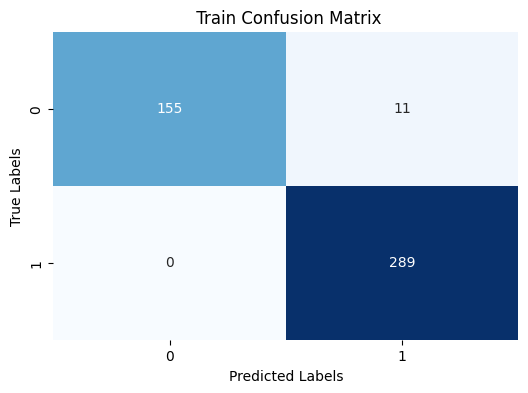

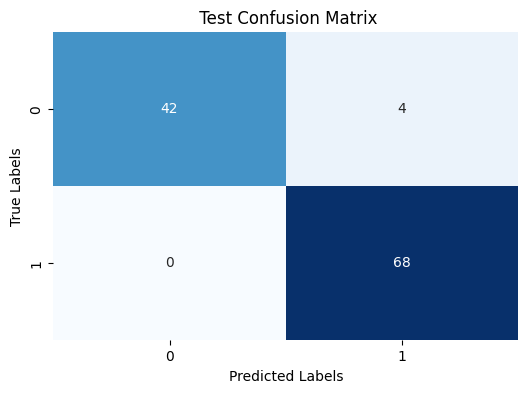

In [52]:
y_pred_train = (y_pred_train_proba > 0.36).astype(np.int64)
y_pred_test_proba = lr.predict_proba(X_test_pca)[:,1]
y_pred_test = (y_pred_test_proba > 0.36).astype(np.int64)

add_model_to_results('lr_PCA_optimal',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

# 16.5 Comaprison

In [53]:
results.sort_values(by = 'test_F1-Score', ascending = False).sort_values(by = 'test_recall', ascending = False)

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_F1-Score,test_F1-Score
lr_RFA,0.993407,0.973684,0.989726,0.957746,1.0,1.0,0.990964,0.967391
lr_RFE_optimal,0.993407,0.973684,0.989726,0.957746,1.0,1.0,0.990964,0.967391
lr_PCA_optimal,0.975824,0.964912,0.963333,0.944444,1.0,1.0,0.966867,0.956522
lr_PCA,0.982418,0.964912,0.982818,0.957143,0.989619,0.985294,0.979749,0.960038
lr_mutual_information_optimal,0.949451,0.947368,0.926282,0.930556,1.0,0.985294,0.930723,0.938299
lr_correlations_optimal,0.949451,0.929825,0.926282,0.905405,1.0,0.985294,0.930723,0.91656
lr_correlations,0.971429,0.947368,0.972603,0.942857,0.982699,0.970588,0.967253,0.941816
lr_mutual_information,0.96044,0.938596,0.959322,0.942029,0.979239,0.955882,0.953475,0.934463


RFA still stayed the best model. However, a more optimal treshold did not help this model to improve results, because it has already had good F1 score and recall =1 on test. However, the train dataset gives recall of 1 with an optimal treshold, therefore the model migh be more robust in the out-of-sample cases.

PCA model became a lot better after optimising treshold. It cleared the recall to 1 on the test set and increased its F1 score

Mutual information models also impoved its results after optimising the treshold.

Finally, correlations-based model just lost some F1 score on test while not imporving the recall.

Overall, treshold optimization improved quality of the models on average

# 17.1 KNN

Use the gridsearch with many parameters of KNN

In [54]:
import warnings
warnings.filterwarnings('ignore', category = UserWarning)
warnings.simplefilter('ignore')

In [55]:
knn = KNeighborsClassifier(n_jobs=-1)

param_grid = {
    'n_neighbors': [3,5,7,10,13,15,20],             # Number of neighbors to use 
    'weights': ['uniform', 'distanc'],     # Weight function used in prediction
    'leaf_size': [2,3,4, 5, 7, 10,15,20,30],                # Leaf size passed to BallTree or KDTree
    'p': [1,2]
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='f1', n_jobs = -1)
grid_search.fit(X_train, y_train)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
126,0.001630,0.001501,0.004711,0.004420,7,10,2,uniform,"{'leaf_size': 7, 'n_neighbors': 10, 'p': 2, 'w...",0.983051,0.97479,1.0,0.942149,0.982759,0.97655,0.019064,1
14,0.001353,0.000469,0.005831,0.005286,2,10,2,uniform,"{'leaf_size': 2, 'n_neighbors': 10, 'p': 2, 'w...",0.983051,0.97479,1.0,0.942149,0.982759,0.97655,0.019064,1
70,0.001016,0.000362,0.003266,0.000685,4,10,2,uniform,"{'leaf_size': 4, 'n_neighbors': 10, 'p': 2, 'w...",0.983051,0.97479,1.0,0.942149,0.982759,0.97655,0.019064,1
154,0.001299,0.000819,0.004392,0.002041,10,10,2,uniform,"{'leaf_size': 10, 'n_neighbors': 10, 'p': 2, '...",0.983051,0.97479,1.0,0.942149,0.982759,0.97655,0.019064,1
182,0.001019,0.000192,0.004519,0.002535,15,10,2,uniform,"{'leaf_size': 15, 'n_neighbors': 10, 'p': 2, '...",0.983051,0.97479,1.0,0.942149,0.982759,0.97655,0.019064,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.000176,0.000035,0.000000,0.000000,30,13,2,distanc,"{'leaf_size': 30, 'n_neighbors': 13, 'p': 2, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,127
245,0.000199,0.000063,0.000000,0.000000,30,15,1,distanc,"{'leaf_size': 30, 'n_neighbors': 15, 'p': 1, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,127
247,0.000182,0.000037,0.000000,0.000000,30,15,2,distanc,"{'leaf_size': 30, 'n_neighbors': 15, 'p': 2, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,127
249,0.000441,0.000333,0.000000,0.000000,30,20,1,distanc,"{'leaf_size': 30, 'n_neighbors': 20, 'p': 1, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,127


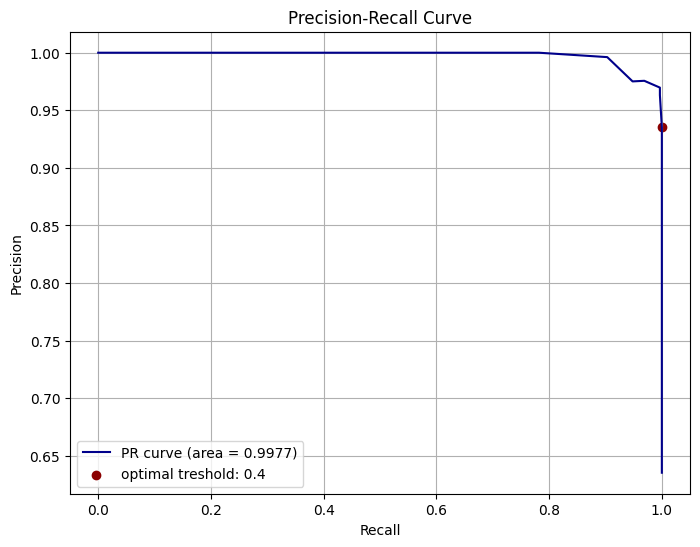

In [56]:
knn = KNeighborsClassifier(n_jobs=-1,leaf_size = 2, n_neighbors = 10, p = 2, weights = 'uniform')

knn.fit(X_train, y_train)
y_pred_train_proba = knn.predict_proba(X_train)[:,1]
PR_curve(y_train,y_pred_train_proba, graph_name = 'Precision-Recall Curve')

test F1-score:0.938
test recall:0.985


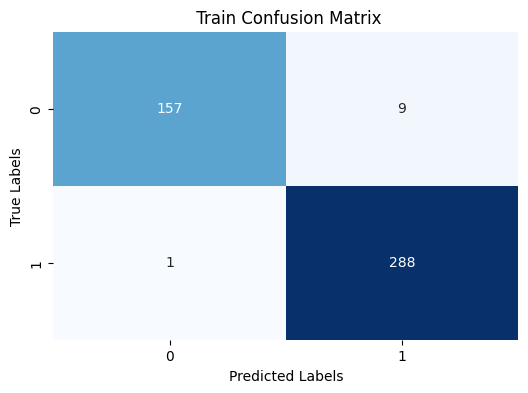

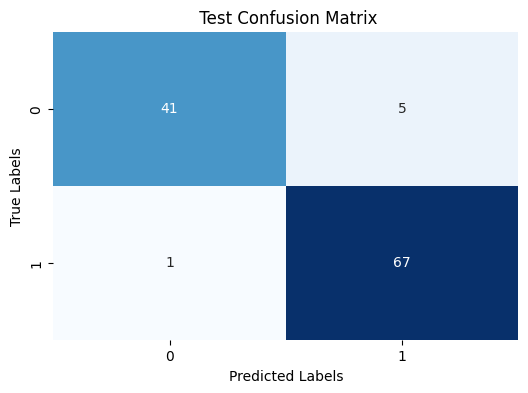

test F1-score:0.946
test recall:1.0


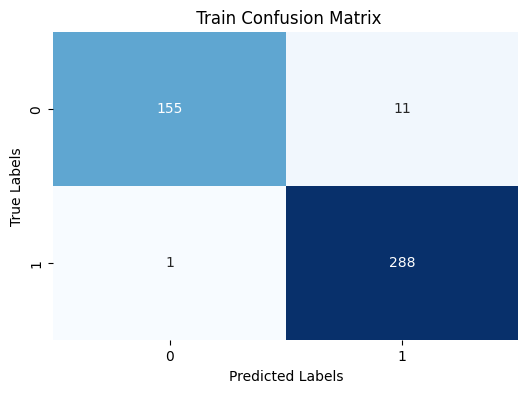

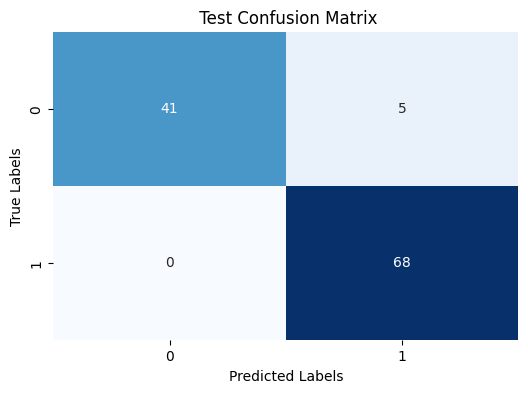

In [57]:
# 1 Solution with basic 0.5 treshold
y_pred_train = (y_pred_train_proba > 0.5).astype(np.int64)
y_pred_test_proba = knn.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_test_proba > 0.5).astype(np.int64)

add_model_to_results('KNN',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

# 1 Solution with optimal treshold
y_pred_train = (y_pred_train_proba > 0.4).astype(np.int64)
y_pred_test_proba = knn.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_test_proba > 0.4).astype(np.int64)

add_model_to_results('KNN_optimal',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

# 17.2 Decision Tree Classifier

Use the gridsearch with many parameters of Decision Tree Classifier

In [ ]:
tree = DecisionTreeClassifier(random_state = 2)

param_grid = {
    'criterion' :['gini', 'entropy', 'log_loss'],     
    'splitter' : ['best', 'random'],
    'max_depth': [3,5,7,9,11],
    'min_samples_split': [2,3,4,5,6],
    'min_samples_leaf':[3,4,5,6,7],
    'max_features':[None, 'sqrt', 'log'],
    'min_impurity_decrease' : [0,0.01, 0.1,0.2]
    }

    
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='f1', n_jobs = -1)
grid_search.fit(X_train, y_train)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'mean_test_score', ascending = False)

In [ ]:
tree = DecisionTreeClassifier(random_state = 2,
                             criterion= 'gini',
                             max_depth= 7,
                             max_features= None,
                             min_impurity_decrease= 0,
                             min_samples_leaf= 5,
                             min_samples_split= 2,
                             splitter= 'random')

tree.fit(X_train, y_train)
y_pred_train_proba = tree.predict_proba(X_train)[:,1]
PR_curve(y_train,y_pred_train_proba, graph_name = 'Precision-Recall Curve')

In [ ]:
# 1 Solution with basic 0.5 treshold
y_pred_train = (y_pred_train_proba > 0.5).astype(np.int64)
y_pred_test_proba = tree.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_test_proba > 0.5).astype(np.int64)

add_model_to_results('tree',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

# 1 Solution with optimal treshold
y_pred_train = (y_pred_train_proba > 0.120).astype(np.int64)
y_pred_test_proba = tree.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_test_proba > 0.120).astype(np.int64)

add_model_to_results('tree_optimal',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

In [ ]:
results.sort_values(by = 'test_F1-Score', ascending = False).sort_values(by = 'test_recall', ascending = False)

# 17.3 SVC

Use the gridsearch with many parameters of SVM

In [ ]:
svc = SVC(random_state = 2, max_iter = 100000)

param_grid = {
    'C': [0.01,0.1,0.25, 0.5, 0.75, 1, 5, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2,3,4,5],
    'gamma': ['scale', 'auto'],
    'tol': [1e-4,1e-3, 1e-2]
    }


grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='f1', n_jobs = -1)
grid_search.fit(X_train, y_train)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'mean_test_score', ascending = False)

In [ ]:
svc = SVC(random_state = 2, 
          max_iter = 100000, 
          C = 0.5, 
          degree = 2, 
          gamma = 'auto', 
          kernel = 'rbf', 
          tol =  0.0001,
          probability=True)

svc.fit(X_train, y_train)
y_pred_train_proba = svc.predict_proba(X_train)[:,1]
PR_curve(y_train,y_pred_train_proba, graph_name = 'Precision-Recall Curve')

In [ ]:
# 1 Solution with basic 0.5 treshold
y_pred_train = (y_pred_train_proba > 0.5).astype(np.int64)
y_pred_test_proba = svc.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_test_proba > 0.5).astype(np.int64)

add_model_to_results('svc',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

# 1 Solution with optimal treshold
y_pred_train = (y_pred_train_proba > 0.263).astype(np.int64)
y_pred_test_proba = svc.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_test_proba > 0.263).astype(np.int64)

add_model_to_results('svc_optimal',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

In [ ]:
results.sort_values(by = 'test_F1-Score', ascending = False).sort_values(by = 'test_recall', ascending = False)

# 17.4 RFA Logistic Regression with additional features 
## (Just Because I want a better model)

Perform feature enginnering: 

-feature 1 : mean / error\
-feature 2: (mean-worst) / error\

In [ ]:
for column in X.columns:
    if 'mean' in column:
        X.loc[:,'normal '+column[5:]] = X['mean '+column[5:]] / X[column[5:]+' error']

        X.loc[:,'normal deviation '+column[5:]] = (X['mean '+column[5:]]-X['worst '+column[5:]]) / X[column[5:]+' error']
    
X = X.fillna(0)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=420)

In [ ]:
lr = LogisticRegression(random_state = 2, solver = 'saga',max_iter = 10000)
rfe = RFE(estimator=lr)
pipeline = Pipeline([
    ('rfe', rfe),
    ('log_reg', lr)
])

param_grid = {
    'rfe__n_features_to_select': [10, 15, 20, 25,30,40],  # Number of features to select in RFE
    'log_reg__C': [0.01, 0.05, 0.1,0.5, 1,10],  # Regularization parameter for logistic regression
    'log_reg__penalty': ['l2','l1'],  # Penalty type (L1 or L2 regularization)
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1', n_jobs = -1)
grid_search.fit(X_train, y_train)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'mean_test_score', ascending = False)

In [ ]:
lr = LogisticRegression(random_state = 2, solver = 'saga', C = 0.1, penalty = 'l2',max_iter = 10000)
rfe = RFE(estimator=lr, n_features_to_select = 40)
rfe.fit(X_train, y_train)
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

In [ ]:
add_model_to_results('lr_RFA_extra_features',
                         y_train,
                         y_test,
                         y_pred_train,
                         y_pred_test)

In [ ]:
results.sort_values(by = 'test_F1-Score', ascending = False).sort_values(by = 'test_recall', ascending = False)

In [ ]:
y_pred_train_proba = rfe.predict_proba(X_train)[:,1]
y_pred_test_proba = rfe.predict_proba(X_test)[:,1]

PR_curve(y_train,y_pred_train_proba, graph_name = 'Precision-Recall Curve Train')
PR_curve(y_test,y_pred_test_proba, graph_name = 'Precision-Recall Curve Test')

# 18 Best model

In [ ]:
results.sort_values(by = 'test_F1-Score', ascending = False).sort_values(by = 'test_recall', ascending = False)

Among the models analyzed, the logistic regression with RFA and extra features model demonstrated the most robust performance. This model achieved a test accuracy of 0.982456, the highest of all models in the comparison. Moreover, its precision and F1-score values, 0.971429 and 0.978261 respectively, were also the highest, indicating a strong ability to balance correct classification of both positive and negative instances. Importantly, there was no significant discrepancy between the training and test results, which suggests that this model does not suffer from overfitting, thereby generalizing well to unseen data.

In comparison, other models such as lr_RFA and lr_RFE_optimal also performed well, with a test accuracy of 0.973684 and an F1-score of 0.967391. However, these models fell slightly short in comparison to lr_RFA_extra_features, particularly in terms of F1-score and test accuracy, highlighting the latter as the superior model. These results also highlight that recursive feature ellimination is a great technique that performs the most robustly on the dataset.

Further down the performance spectrum, models such as KNN_optimal and svc_optimal achieved a test accuracy of 0.95614 and an F1-score of 0.945652. While these models displayed acceptable levels of performance, they did not achieve the same level of accuracy and balance across metrics as the logistic regression models. Finally, tree-based models such as tree_optimal showed the lowest performance among the evaluated models, with a test accuracy of 0.926471 and a lower F1-score of 0.887148, confirming their weaker generalization capability compared to other approaches.